<a href="https://colab.research.google.com/github/ChinarVyas/Practise/blob/main/House_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv(r'/content/drive/MyDrive/Data Analysis/Data/housing_price_dataset.csv')

Data Review

In [3]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [4]:
df.tail()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957
49999,1572,5,3,Rural,2011,221618.583218


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [6]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [7]:
df['Neighborhood'].value_counts()

Suburb    16721
Rural     16676
Urban     16603
Name: Neighborhood, dtype: int64

In [8]:
le=LabelEncoder()
df['Neighborhood']=le.fit_transform(df['Neighborhood'])

In [9]:
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,0,1969,215355.283618
1,2459,3,2,0,1980,195014.221626
2,1860,2,1,1,1970,306891.012076
3,2294,2,1,2,1996,206786.787153
4,2130,5,2,1,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,0,1975,100080.865895
49996,2854,2,2,1,1988,374507.656727
49997,2979,5,3,1,1962,384110.555590
49998,2596,5,2,0,1984,380512.685957


In [10]:
df['Neighborhood'].value_counts()

1    16721
0    16676
2    16603
Name: Neighborhood, dtype: int64

In [11]:
df.corr()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
SquareFeet,1.000000,-0.002638,-0.003275,0.011186,0.000482,0.750720
Bedrooms,-0.002638,1.000000,0.007405,-0.004208,0.003147,0.072624
Bathrooms,-0.003275,0.007405,1.000000,0.001613,0.003748,0.028418
Neighborhood,0.011186,-0.004208,0.001613,1.000000,-0.000174,0.016429
YearBuilt,0.000482,0.003147,0.003748,-0.000174,1.000000,-0.002288
Price,0.750720,0.072624,0.028418,0.016429,-0.002288,1.000000


<Axes: >

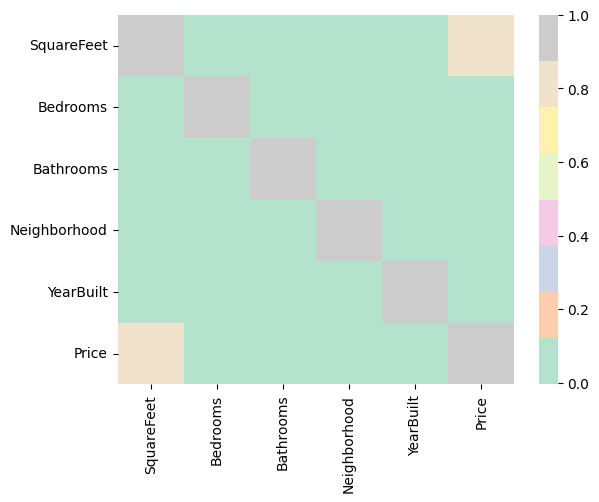

In [12]:
sns.heatmap(df.corr(),cmap='Pastel2')

<Axes: xlabel='SquareFeet', ylabel='Price'>

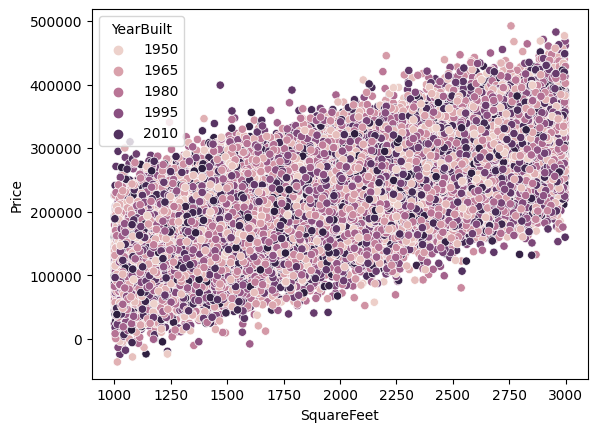

In [13]:
sns.scatterplot(x='SquareFeet',y='Price', data=df,hue='YearBuilt')

<Axes: xlabel='YearBuilt', ylabel='Price'>

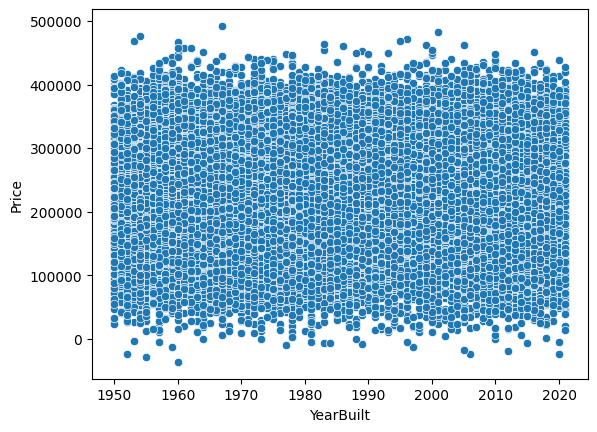

In [14]:
sns.scatterplot(x='YearBuilt',y='Price', data=df)

Train the model

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from scipy import stats

In [17]:
x=df.iloc[: ,0:-1]

In [18]:
y=df.iloc[: ,-1]

In [19]:
print(x.shape)
print(y.shape)

(50000, 5)
(50000,)


In [21]:
maxacu = 0
maxRs = 0
for i in range(1,200):
  x_train,x_test,y_train,y_test =train_test_split(x,y, test_size=0.35, random_state=i)
  lr=LinearRegression()
  lr.fit(x_train,y_train)
  pred=lr.predict(x_test)
  Rss=r2_score(y_test,pred)
  if Rss>maxacu:
    maxacu=Rss
    maxRs=i

print("R^2 is ", maxacu, 'at random state',  maxRs)

R^2 is  0.5805424599254416 at random state 79


In [22]:
x_train,x_test,y_train,y_test =train_test_split(x,y, test_size=0.30, random_state=42)

In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(35000, 5)
(15000, 5)
(35000,)
(15000,)


In [24]:
model_regression = {
    "Linear Regression" : LinearRegression(),
        "Decision Tree" : DecisionTreeRegressor(),
        "Random Forest" : RandomForestRegressor(),
    "Gradient Boosting" :GradientBoostingRegressor(),
    "XGBoost"           :xgb.XGBRFRegressor()
}

In [25]:
for i,model in model_regression.items():
    model.fit(x_train,y_train)
    print(f'{i} trained')

Linear Regression trained
Decision Tree trained
Random Forest trained
Gradient Boosting trained
XGBoost trained


In [26]:
for i, model in model_regression.items():
    print(f'{i} R^2 Score: {format(model.score(x_test, y_test), ".3f")}')

Linear Regression R^2 Score: 0.573
Decision Tree R^2 Score: 0.074
Random Forest R^2 Score: 0.512
Gradient Boosting R^2 Score: 0.571
XGBoost R^2 Score: 0.571


In [27]:
for i, model in model_regression.items():
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'{i} MAE: {format(mae, ".3f")}')

Linear Regression MAE: 39741.647
Decision Tree MAE: 58591.603
Random Forest MAE: 42420.370
Gradient Boosting MAE: 39806.558
XGBoost MAE: 39817.608


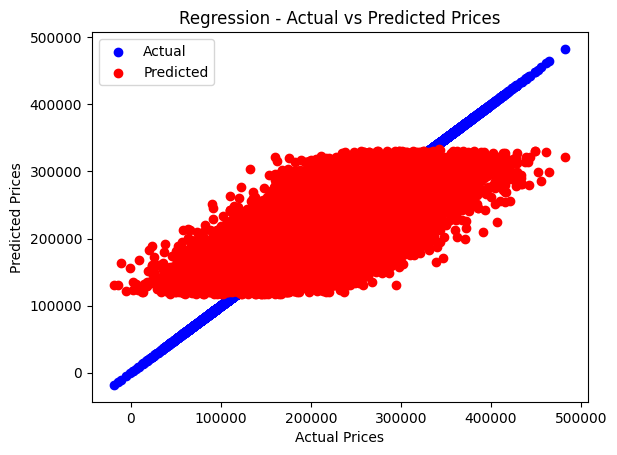

In [31]:
    plt.scatter(y_test, y_test, color='blue', label='Actual')
    plt.scatter(y_test, y_pred, color='red', label='Predicted')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')

    plt.title(f"{'Regression'} - Actual vs Predicted Prices")
    plt.legend()
    plt.show()

**Linear Model is the best model based on the % of R^2 and least MAE.**